In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import eurostat
import numpy as np
import seaborn as sns

In [10]:
# making a variable, that will filter the eurostat data 
filter_pars_culture_expenditure = {'coicop': ['TOTAL'], 'time' : ['2010', '2015', '2020']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data = eurostat.get_data_df('cult_pcs_hbs', filter_pars=filter_pars_culture_expenditure)

# Dropping unneeded columns and renaming the rest 
eurostat_data = eurostat_data.drop(columns = ['freq', 'unit', 'coicop'])
eurostat_data = eurostat_data.rename(columns = {'geo\TIME_PERIOD' : 'Country'})


eurostat_data

,Country,2010,2015,2020
0,AT,33219.0,34491.0,34730.0
1,BE,31264.0,34923.0,30908.0
2,BG,9334.0,12517.0,13182.0
3,CY,44641.0,35579.0,34177.0
4,CZ,13161.0,15055.0,17132.0
...,...,...,...,...
97,SI,25514.0,25762.0,26154.0
98,SK,15041.0,19341.0,15691.0
99,TR,15917.0,21628.0,NaN
100,UK,23692.0,25316.0,NaN


In [32]:
# Converting the dataframe to long format
Culture_Expenditure = eurostat_data.melt(id_vars=[('Country')], var_name='Year', value_name='Culture expenditure, PPS')

origin_df = Culture_Expenditure.drop_duplicates()

In [47]:
# Comparing countries
countries = ['BG', 'RO', 'EL', 'RS', 'AT', 'HU', 'PL']
df_comparison = origin_df[origin_df['Country'].isin(countries)]

df_comparison

,Country,Year,"Culture expenditure, PPS"
0,AT,2010,33219.0
2,BG,2010,9334.0
8,EL,2010,29974.0
13,HU,2010,14017.0
24,PL,2010,15263.0
26,RO,2010,9623.0
27,RS,2010,NaN
102,AT,2015,34491.0
104,BG,2015,12517.0
110,EL,2015,24190.0


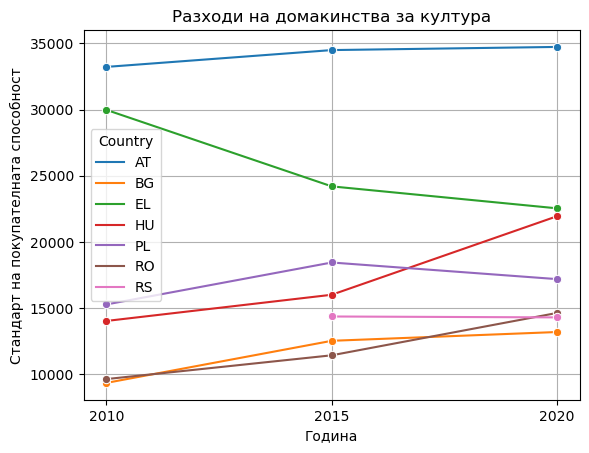

In [49]:
# Plotting for food expenditure for each different country
sns.lineplot(x='Year', y='Culture expenditure, PPS', hue='Country', data=df_comparison, marker='o')
plt.title('Разходи на домакинства за култура')
plt.xlabel('Година')
plt.ylabel('Стандарт на покупателната способност')
plt.grid(True)

In [17]:
# making a variable, that will filter the eurostat data 
filter_pars_culture_wages = {'age' : ['TOTAL'], 'geo': ['BG', 'RO', 'EL', 'RS', 'AT', 'HU', 'PL', 'EU27_2020'], 
                             'isco08' : ['TOTAL'], 'sex' : ['T'], 'nace_r2' : ['P-S'], 'indic_se':['MEAN_E_EUR'],
                            'time':['2018'], 'worktime':['FT']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data = eurostat.get_data_df('earn_ses_annual', filter_pars=filter_pars_culture_wages)

eurostat_data

,freq,nace_r2,isco08,worktime,age,sex,indic_se,geo\TIME_PERIOD,2002,2006,2010,2014,2018
0,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,BG,1747.0,2518.0,4514.00,5556.0,7675.0
1,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,RO,2445.0,4874.0,5812.00,6605.0,14677.0
2,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,EL,NaN,26540.0,25637.00,21301.0,20632.0
3,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,RS,NaN,NaN,NaN,6772.0,7637.0
4,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,AT,NaN,37236.0,39525.00,43429.0,46828.0
5,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,HU,5172.0,7857.0,8522.00,9297.0,11999.0
6,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,PL,6181.0,7952.0,10257.00,11173.0,12734.0
7,A,P-S,TOTAL,FT,TOTAL,T,MEAN_E_EUR,EU27_2020,NaN,NaN,28766.11,30584.0,NaN


In [18]:
eurostat_data = eurostat_data.drop(columns = ['freq', 'nace_r2', 'worktime', 'age', 'sex', 'indic_se', 'isco08'])
eurostat_data = eurostat_data.rename(columns = {'geo\TIME_PERIOD' : 'Country'})

eurostat_data

,Country,2002,2006,2010,2014,2018
0,BG,1747.0,2518.0,4514.00,5556.0,7675.0
1,RO,2445.0,4874.0,5812.00,6605.0,14677.0
2,EL,NaN,26540.0,25637.00,21301.0,20632.0
3,RS,NaN,NaN,NaN,6772.0,7637.0
4,AT,NaN,37236.0,39525.00,43429.0,46828.0
5,HU,5172.0,7857.0,8522.00,9297.0,11999.0
6,PL,6181.0,7952.0,10257.00,11173.0,12734.0
7,EU27_2020,NaN,NaN,28766.11,30584.0,NaN


In [21]:
# Converting the dataframe to long format
Culture_wage = eurostat_data.melt(id_vars=[('Country')], var_name='Year', value_name='Mean Wage')

Culture_wage.head()

,Country,Year,Mean Wage
0,BG,2002,1747.0
1,RO,2002,2445.0
2,EL,2002,NaN
3,RS,2002,NaN
4,AT,2002,NaN


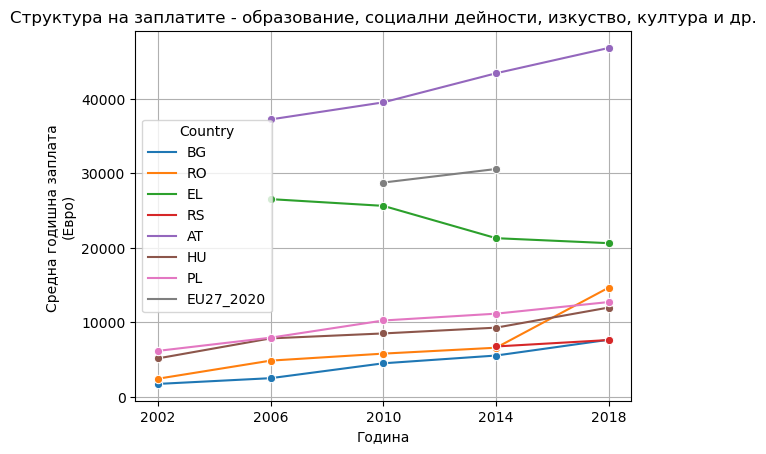

In [26]:
# Plotting for food expenditure for each different country
sns.lineplot(x='Year', y='Mean Wage', hue='Country', data=Culture_wage, marker='o')
plt.title('Структура на заплатите - образование, социални дейности, изкуство, култура и др.')
plt.xlabel('Година')
plt.ylabel('Средна годишна заплата \n(Евро)')
plt.grid(True)